**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Reading and exploring the data**

In [2]:
data = pd.read_csv("/kaggle/input/istanbul-airbnb-dataset/listings.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


**Understanding the shape of data**

In [3]:
data.shape

(23728, 16)

**Extracting the column names**

In [4]:
list(data.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

**Calculating the booking price metrics**

In [5]:
booking_price = data.loc[:, 'price']

#mean value
mean_bookingprice = np.mean(booking_price)
print('Mean booking price: ₺', round(mean_bookingprice,2))

#median value
median_bookingprice = np.median(booking_price)
print('Median booking price: ₺', median_bookingprice)

#standard deviation value
std_bookingprice = np.std(booking_price)
print('Standard deviation: ₺', round(std_bookingprice, 2))

#maximum value
max_bookingprice = np.max(booking_price)
print('Maximum booking price: ₺', max_bookingprice)

#minimum value
min_bookingprice = np.min(booking_price)
print('Minimum booking price: ₺', min_bookingprice)

Mean booking price: ₺ 484.64
Median booking price: ₺ 247.0
Standard deviation: ₺ 1973.84
Maximum booking price: ₺ 76922
Minimum booking price: ₺ 0


**Booking Price distribution**

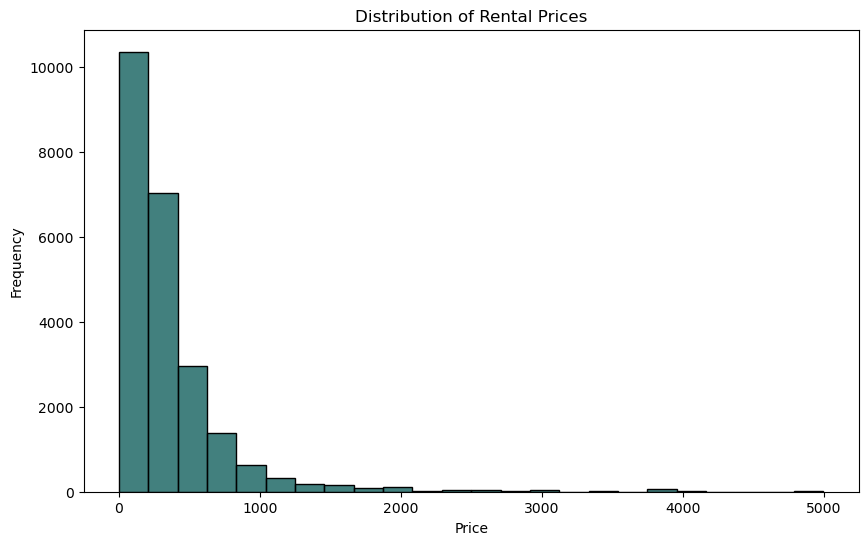

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['price'] <= 5000], x='price', bins="doane", kde=False, color='#035553')
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Unique Neighboorhood and Neighbourhood_Groups**

In [7]:
region = data.loc[:, 'neighbourhood_group']

#extracting unique values
unique_regions = pd.unique(region)
print('Distinct regions: ', unique_regions)

Distinct regions:  [nan]


In [8]:
#since this data has no major regions(neighbourhood groups), I decided to map out my own

asianorth_side = ['Sile', 'Beykoz', 'Cekmekoy']
asiasouth_side = ['Kadikoy', 'Uskudar', 'Atasehir', 'Maltepe', 'Umraniye', 'Sultanbeyli', 'Pendik', 'Kartal', 'Adalar', 'Tuzla', 'Sancaktepe']
europenorth_side = ['Sisli', 'Sariyer', 'Eyup', 'Sultangazi', 'Catalca', 'Arnavutkoy']
europesouth_side = ['Beyoglu', 'Besiktas', 'Fatih', 'Kagithane', 'Bakirkoy', 'Basaksehir', 'Bahcelievler', 'Avcilar', 'Bayrampasa', 'Esenler', 'Kucukcekmece', 'Bagcilar', 'Buyukcekmece', 'Beylikduzu', 'Zeytinburnu', 'Gaziosmanpasa', 'Gungoren', 'Silivri', 'Esenyurt']

#create the mapping
neighbourhood_to_group = {}
for neighbourhood in asianorth_side:
    neighbourhood_to_group[neighbourhood] = 'Asia North'
for neighbourhood in asiasouth_side:
    neighbourhood_to_group[neighbourhood] = 'Asia South'
for neighbourhood in europenorth_side:
    neighbourhood_to_group[neighbourhood] = 'Europe North'
for neighbourhood in europesouth_side:
    neighbourhood_to_group[neighbourhood] = 'Europe South'
    
#lets apply the mapping
data['neighbourhood_group'] = data['neighbourhood'].map(neighbourhood_to_group)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Asia South,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Europe South,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Europe South,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,Europe North,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,Europe North,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


In [9]:
subregion = data.loc[:, 'neighbourhood']

#extracting unique values
unique_subregion = pd.unique(subregion)
print('Distinct subregions: ', unique_subregion)

Distinct subregions:  ['Uskudar' 'Besiktas' 'Beyoglu' 'Sisli' 'Sariyer' 'Fatih' 'Kadikoy'
 'Kagithane' 'Adalar' 'Maltepe' 'Esenyurt' 'Beykoz' 'Basaksehir'
 'Bahcelievler' 'Bagcilar' 'Silivri' 'Beylikduzu' 'Umraniye' 'Sile'
 'Cekmekoy' 'Kucukcekmece' 'Sancaktepe' 'Bakirkoy' 'Tuzla' 'Pendik'
 'Atasehir' 'Kartal' 'Sultangazi' 'Gaziosmanpasa' 'Buyukcekmece' 'Eyup'
 'Zeytinburnu' 'Catalca' 'Avcilar' 'Gungoren' 'Esenler' 'Sultanbeyli'
 'Bayrampasa' 'Arnavutkoy']


In [10]:
#counting the unique values
unique_subregion_count = data['neighbourhood'].value_counts().count()
print('Number of subregions: ', unique_subregion_count)

Number of subregions:  39


**Calculating the percentage properties by region and subregion**

In [11]:
percent_by_region = round(data['neighbourhood_group'].value_counts(normalize=True)*100, 2)
percent_by_region

Europe South    60.77
Asia South      20.72
Europe North    17.14
Asia North       1.37
Name: neighbourhood_group, dtype: float64

In [12]:
percent_by_subregion = round(data['neighbourhood'].value_counts(normalize=True)*100, 2)
percent_by_subregion

Beyoglu          26.85
Sisli            14.12
Fatih            12.36
Kadikoy           9.82
Besiktas          7.37
Uskudar           3.35
Kagithane         2.80
Esenyurt          2.76
Atasehir          1.74
Maltepe           1.60
Sariyer           1.54
Bakirkoy          1.25
Basaksehir        1.18
Eyup              1.01
Bahcelievler      1.00
Umraniye          0.96
Avcilar           0.91
Pendik            0.91
Kucukcekmece      0.84
Kartal            0.83
Adalar            0.75
Bagcilar          0.75
Sile              0.64
Buyukcekmece      0.58
Beylikduzu        0.52
Beykoz            0.50
Zeytinburnu       0.47
Tuzla             0.44
Gaziosmanpasa     0.36
Gungoren          0.30
Arnavutkoy        0.30
Silivri           0.23
Cekmekoy          0.23
Sancaktepe        0.22
Bayrampasa        0.14
Sultangazi        0.10
Esenler           0.09
Sultanbeyli       0.09
Catalca           0.08
Name: neighbourhood, dtype: float64

**Property Category**

In [13]:
roomcategory = pd.unique(data.room_type)
print('The property categories registered in Istanbul are: ', roomcategory)

The property categories registered in Istanbul are:  ['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [14]:
percent_category = round(data['room_type'].value_counts(normalize=True)*100, 2)
percent_category

Entire home/apt    49.93
Private room       43.20
Hotel room          4.02
Shared room         2.84
Name: room_type, dtype: float64

In [15]:
fig = px.pie(names=roomcategory, values=percent_category)
fig.update_layout(
    title="Room Category Distribution",
    colorway=["#6f9167", "#035553", "#0084b4", "#70b5d4"]  
)
fig

**Number of reviews**

In [16]:
reviews = data.loc[: , 'number_of_reviews']

#maximum number of reviews for a single property
maxreviews = np.max(reviews)
print('The maximum number of reviews for a single property is:', maxreviews)

#minimum number of reviews for a single property
minreviews = np.min(reviews)
print('The minimum number of reviews for a single property is:', minreviews)

#average number of reviews for a single property
avgreviews = np.mean(reviews)
print('The average number of reviews for a single property is:', int(avgreviews))

#standard deviation of reviews for a single property
stdreviews = np.std(reviews)
print('The standard deviation of the number of reviews for a single property is:', int(stdreviews))

The maximum number of reviews for a single property is: 345
The minimum number of reviews for a single property is: 0
The average number of reviews for a single property is: 7
The standard deviation of the number of reviews for a single property is: 23


Text(0, 0.5, 'Frequency')

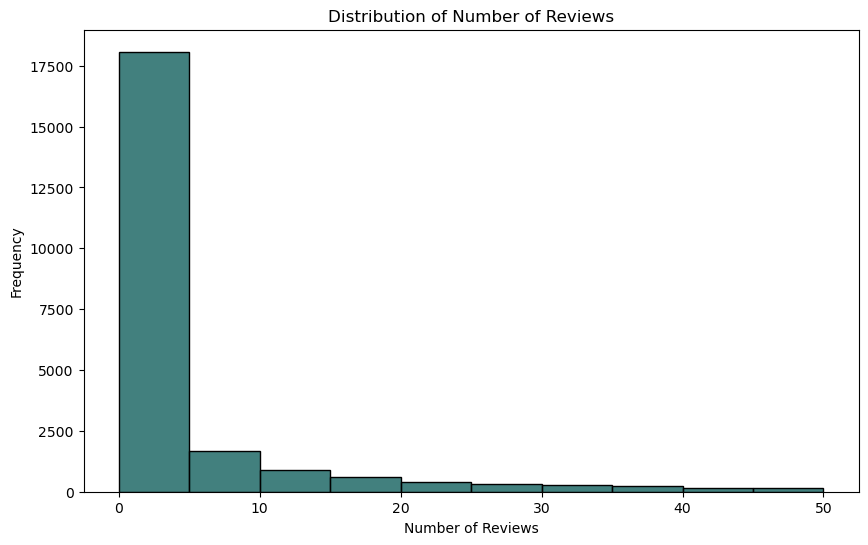

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['number_of_reviews'] <= 50], x='number_of_reviews', binwidth=5, kde=False, color='#035553')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

**Minimum Nights**

In [18]:
minimum_nights = data.loc[:, 'minimum_nights']

max_minimum_nights = np.max(minimum_nights)
print('The maximum number of minimum nights for a single property is:', int(max_minimum_nights))

min_minimum_nights = np.min(minimum_nights)
print('The minimum number of minimum nights for a single property is:', int(min_minimum_nights))

average_minimum_nights  = np.mean(minimum_nights)
print('The average number of minimum nights for a single property is:', int(average_minimum_nights))

std_dev_minimum_nights  = np.std(minimum_nights)
print('The standard deviation of the number of minimum nights for a single property is:', int(std_dev_minimum_nights))

The maximum number of minimum nights for a single property is: 1125
The minimum number of minimum nights for a single property is: 1
The average number of minimum nights for a single property is: 4
The standard deviation of the number of minimum nights for a single property is: 27


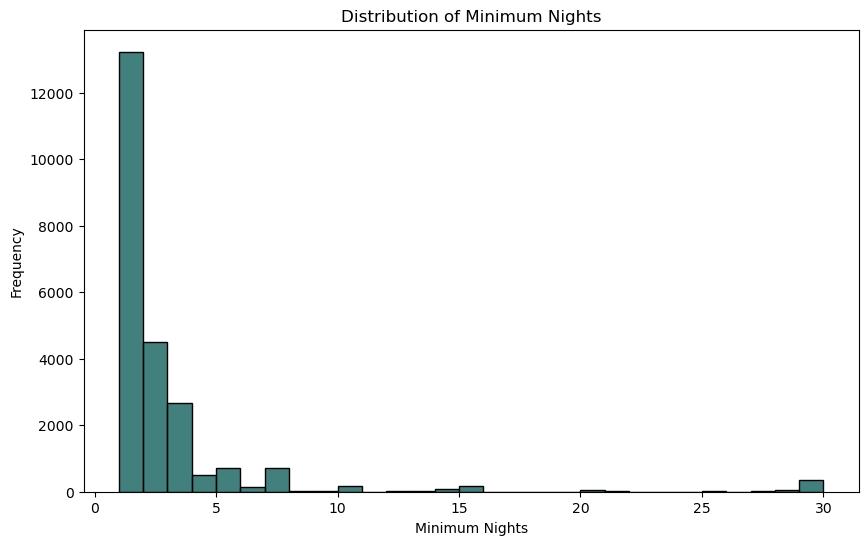

In [19]:
# Seaborn histogram with x-axis limit, binwidth of 1, and x-ticks for minimum nights
plt.figure(figsize=(10, 6))
sns.histplot(data[data['minimum_nights'] <= 30], x='minimum_nights', binwidth=1, kde=False, color='#035553')
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

**Properties distribution**

In [20]:
properties_hosts = data.loc[:, 'calculated_host_listings_count']

average_properties_hosts = np.mean(properties_hosts)
print('The average number of properties per host is:', int(average_properties_hosts))

std_dev_properties_hosts = np.std(properties_hosts)
print('The standard deviation of properties per host is:', int(std_dev_properties_hosts))

median_properties_hosts = np.median(properties_hosts)
print('The median number of properties per host is:', int(median_properties_hosts))

max_properties_hosts = np.max(properties_hosts)
print('The maximum number of properties per host is:', int(max_properties_hosts))

min_properties_hosts = np.min(properties_hosts)
print('The minimum number of properties per host is:', int(min_properties_hosts))


The average number of properties per host is: 5
The standard deviation of properties per host is: 16
The median number of properties per host is: 2
The maximum number of properties per host is: 176
The minimum number of properties per host is: 1


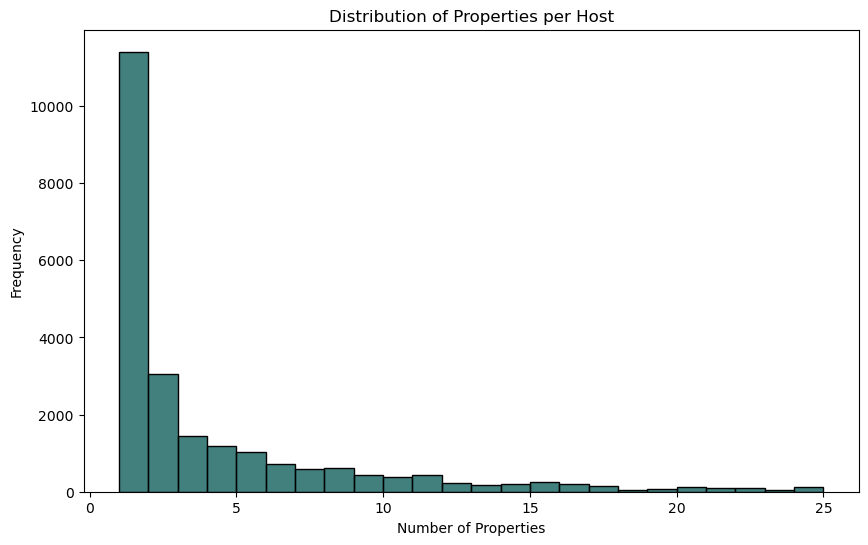

In [21]:
# Seaborn histogram for hosts with up to 10 properties with data labels
plt.figure(figsize=(10, 6))
ax = sns.histplot(data[data['calculated_host_listings_count'] <= 25], x='calculated_host_listings_count', binwidth=1, kde=False, color='#035553')
plt.title('Distribution of Properties per Host')
plt.xlabel('Number of Properties')
plt.ylabel('Frequency')
plt.show()

**Maximum Rental Prices by neighbourhood**

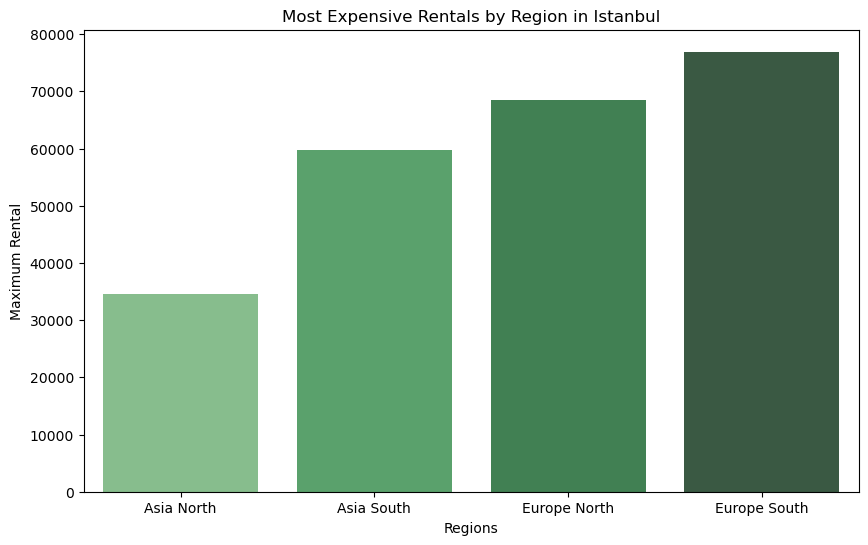

In [22]:
max_region_price = data.loc[:,['neighbourhood_group', 'price']].groupby('neighbourhood_group').max()

#convert values to integers
max_region_price = max_region_price.astype(int)

#reset the index to make the 'neighbourhood_group' a column
max_region_price.reset_index(inplace=True)

#rename the columns for better understanding
max_region_price.columns = ['Regions', 'Maximum Rental']

#plotting figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Regions', y='Maximum Rental', data=max_region_price, palette='Greens_d')
plt.title('Most Expensive Rentals by Region in Istanbul')
plt.xlabel('Regions')
plt.ylabel('Maximum Rental')
plt.show()

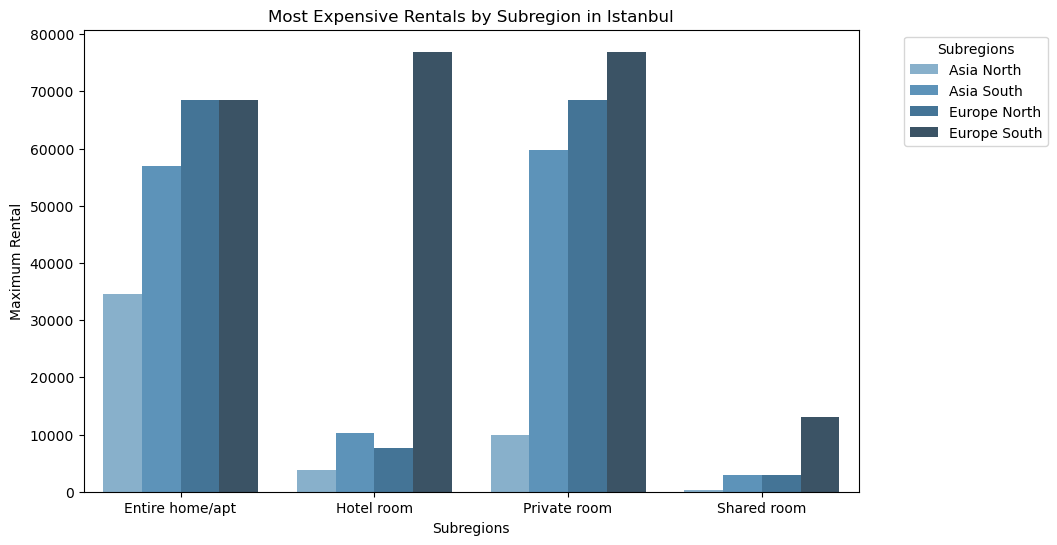

In [23]:
# Group the data by region and room type and calculate the maximum rental value
max_subregion_price = data.loc[:, ['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group', 'room_type']).max().reset_index()

# Convert the values to integers
max_subregion_price['price'] = max_subregion_price['price'].astype(int)

#rename the columns for better understanding
max_subregion_price.columns = ['Regions', 'Subregions', 'Maximum Rental']

#plotting figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Subregions', y='Maximum Rental', data=max_subregion_price, hue='Regions', palette='Blues_d')
plt.title('Most Expensive Rentals by Subregion in Istanbul')

plt.xlabel('Subregions')
plt.ylabel('Maximum Rental')
# Move legend outside the plot
plt.legend(title='Subregions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Average rental prices by neighbourhood group**

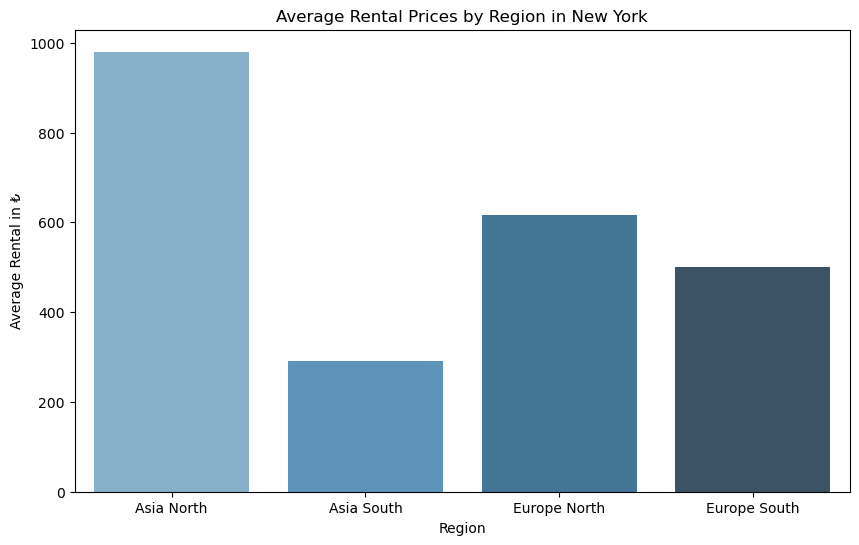

In [24]:
avg_region_rental_price = data.loc[:,['neighbourhood_group','price']].groupby('neighbourhood_group').mean()

#convert the values to integers
avg_region_rental_price = avg_region_rental_price.astype(int)

#reset the index to a column again
avg_region_rental_price.reset_index(inplace=True)

#rename columns for better understanding
avg_region_rental_price.columns=['Regions', 'Average Rental']

#seaborn barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Regions', y='Average Rental', data=avg_region_rental_price, palette='Blues_d')
plt.title('Average Rental Prices by Region in New York')
plt.xlabel('Region')
plt.ylabel('Average Rental in ₺')
plt.show()

**Average reviews by Room Type**

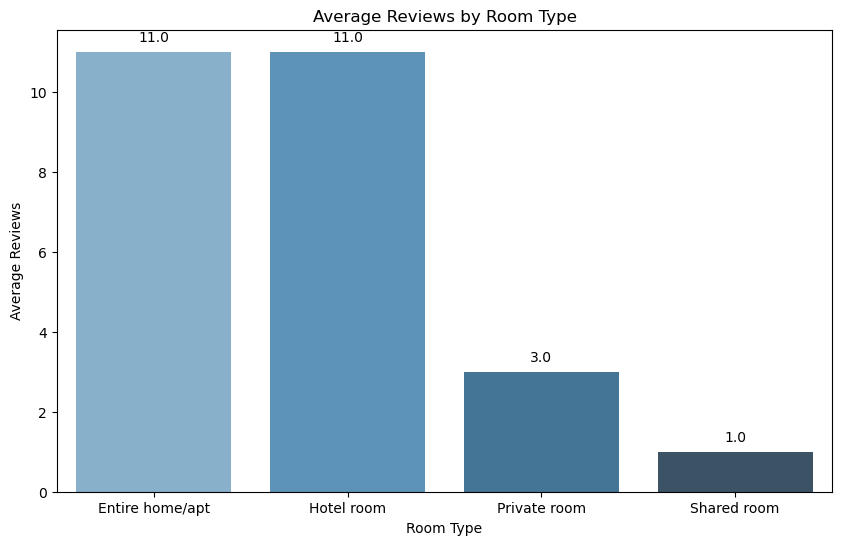

In [25]:
#group the data by room type and calculate the average number of reviews
avg_reviews_roomtype = data.loc[:, ['number_of_reviews', 'room_type']].groupby('room_type').mean()

#convert the values to integers
avg_reviews_roomtype = avg_reviews_roomtype.astype(int)

#reset the index to make 'room_type' a column again
avg_reviews_roomtype.reset_index(inplace=True)

#rename the columns for better understanding
avg_reviews_roomtype.columns = ['Room Type', 'Average Reviews']

#seaborn barplot 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Room Type', y='Average Reviews', data=avg_reviews_roomtype, palette='Blues_d')
plt.title('Average Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews')
#for data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**Number of owners by neighbourhood**

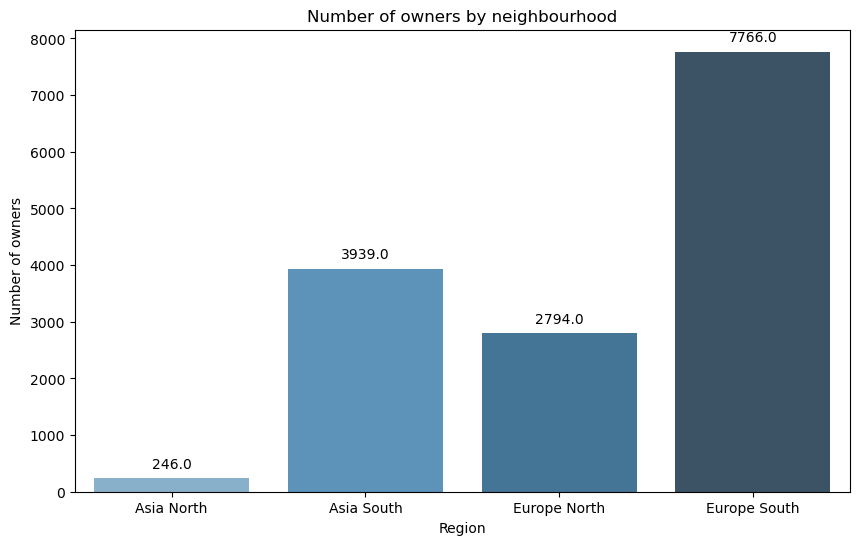

In [26]:
#select columns and perform mathematical operation
owners_by_region = data.loc[:, ['host_id', 'neighbourhood_group']].groupby('neighbourhood_group').nunique()

#convert the values to integers
owners_by_region = owners_by_region.astype(int)

#reset the index to make 'host_id' a column again
owners_by_region.reset_index(inplace=True)

#rename the columns for better understanding
owners_by_region.columns = ['Owner', 'Region']

#seaborn barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Owner', y='Region', data=owners_by_region, palette='Blues_d')
plt.title('Number of owners by neighbourhood')
plt.xlabel('Region')
plt.ylabel('Number of owners')
#for data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**Percentage of owners by neighbourhood**

In [27]:
#slice the the owners and the regions from the dataset
owners_by_region = data.loc[:, ['host_id', 'neighbourhood_group']]

#to get unique number of hosts, we will remove duplicates from the dataset
unique_owners_byregion = owners_by_region.drop_duplicates()

#calculate the percentage
percent_owners_byregion = unique_owners_byregion['neighbourhood_group'].value_counts(normalize=True) * 100

#get the respective region names
regions = pd.unique(data.neighbourhood_group)

fig = px.pie(names=regions, values=percent_owners_byregion)
fig.update_layout(
    title="Owners Distribution",
    colorway=["#6f9167", "#035553", "#0084b4", "#70b5d4"]  
)
fig

**Maximum rental price by region and type of accomodation**

In [28]:
# Group the data by region and room type and calculate the maximum rental value
max_value_region_type = data.loc[:, ['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group', 'room_type']).max().reset_index()

# Convert the values to integers
max_value_region_type['price'] = max_value_region_type['price'].astype(int)

# Rename the columns for better understanding
max_value_region_type.columns = ['Region', 'Type', 'Maximum Value']
max_value_region_type

,Region,Type,Maximum Value
0,Asia North,Entire home/apt,34618
1,Asia North,Hotel room,3846
2,Asia North,Private room,9997
3,Asia North,Shared room,302
4,Asia South,Entire home/apt,56999
5,Asia South,Hotel room,10285
6,Asia South,Private room,59686
7,Asia South,Shared room,3003
8,Europe North,Entire home/apt,68539
9,Europe North,Hotel room,7711


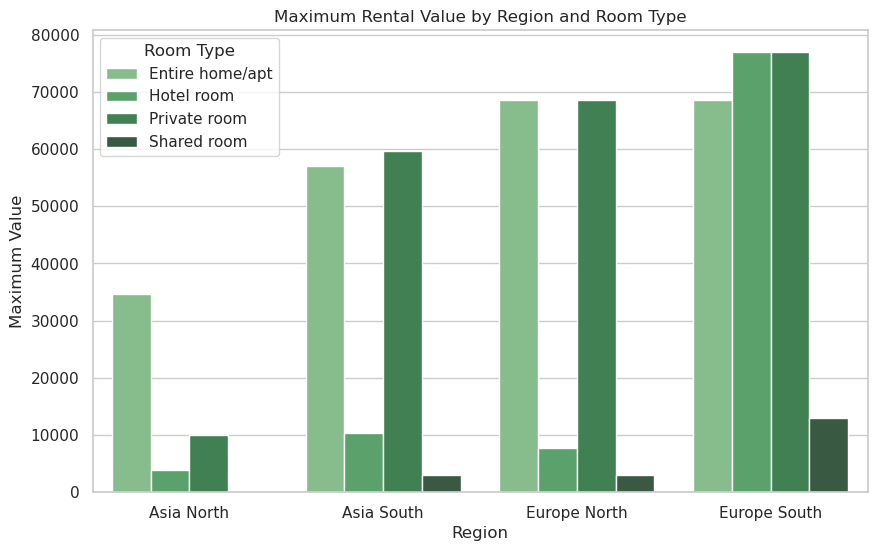

In [29]:
#plotting figure
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.barplot(x='Region', y='Maximum Value', hue='Type', data=max_value_region_type, palette='Greens_d')
plt.title('Maximum Rental Value by Region and Room Type')
plt.xlabel('Region')
plt.ylabel('Maximum Value')
plt.legend(title='Room Type')
plt.show()

**Apartments located in the most expensive neighbourhood**

In [30]:
#lets calculate the most average-expensive neighbourhood
expensive_subregion = data.loc[:, ['neighbourhood', 'price']].groupby(['neighbourhood']).mean()
sorted_result = expensive_subregion.sort_values(by='price', ascending=False)
sorted_result.head(1)

,price
neighbourhood,
Beykoz,1594.420168


In [31]:
#filtering data from the expensive neighbourhood only
condition = data['neighbourhood'].str.contains('Beykoz')
filtered_data = data[condition]

#define the average location as a tuple of latitude and longitude
avg_latitude = filtered_data['latitude'].mean()
avg_longitude = filtered_data['longitude'].mean()
average_location = (avg_latitude, avg_longitude)

# Sample 20 rows from the most expensive region data
data_sample = filtered_data.sample(20, random_state=1)

# Create the map object
map_sample = fl.Map(location=average_location, zoom_start=12, control_scale=True)

# Add markers to the map
for _, location_info in data_sample.iterrows():
    marker_location = [location_info['latitude'], location_info['longitude']]
    marker_popup = location_info['neighbourhood']
    fl.Marker(location=marker_location, popup=marker_popup).add_to(map_sample)

# Display the map
map_sample

**Location of properties by their type**

In [32]:
#define the average location as a tuple of latitude and longitude
avg_latitude = data['latitude'].mean()
avg_longitude = data['longitude'].mean()
average_location = (avg_latitude, avg_longitude)

# Select columns and sample 50 rows
columns = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
data_plot = data.loc[:, columns].sample(50, random_state=1)

# Create a new column called 'color'
data_plot.loc[:, 'color'] = 'NA'

# Define conditions for each room type
data_entire_apt = data_plot.loc[:, 'room_type'] == 'Entire home/apt'
data_hotel_room = data_plot.loc[:, 'room_type'] == 'Hotel room'
data_private_room = data_plot.loc[:, 'room_type'] == 'Private room'
data_shared_room = data_plot.loc[:, 'room_type'] == 'Shared room'

# Assign colors based on room type
data_plot.loc[data_private_room, 'color'] = 'blue'
data_plot.loc[data_entire_apt, 'color'] = 'black'
data_plot.loc[data_shared_room, 'color'] = 'green'
data_plot.loc[data_hotel_room, 'color'] = 'orange'

# Draw map
map = fl.Map(location=average_location, zoom_start=14, control_scale=True)

for index, location_info in data_plot.iterrows():
    fl.Marker(
        [location_info['latitude'], location_info['longitude']],
        popup = location_info[['neighbourhood_group', 'room_type']].to_string(),
        icon = fl.Icon(color = location_info['color'])
    ).add_to(map)
map